In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Student_Performance_Por'
EXPERIMENT_SESSION_UUID = '638da338-6a90-44a7-a835-17f062b941fb'
SENSITIVE_ATTRS = ['sex']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(114, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.834356,0.861702,1.000000,0.000000,0.797101,1.000000,0.000000,0
24,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.237075,0.222504,0.155280,0.641358,0.256925,0.175552,0.576607,0
48,Epistemic_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.050502,0.046566,0.030003,0.149771,0.055863,0.036258,0.132882,0
72,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.902527,0.921212,1.000000,0.000000,0.875000,1.000000,0.000000,0
96,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.087591,0.084337,0.000000,1.000000,0.092593,0.000000,1.000000,0
120,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.576923,0.545455,0.000000,1.000000,0.600000,0.000000,1.000000,0
144,IQR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.086410,0.083248,0.051698,0.279834,0.090718,0.051735,0.243866,0
168,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.076530,0.075238,0.042570,0.278786,0.078291,0.034937,0.248611,0
192,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.892945,0.895319,0.943704,0.593846,0.889710,0.957091,0.625000,0
216,Mean_Prediction,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-02 19:09:12.969,638da338-6a90-44a7-a835-17f062b941fb,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 1.0, 'Az': 2.0}",0.145081,0.124052,0.073547,0.438741,0.173729,0.115176,0.403757,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

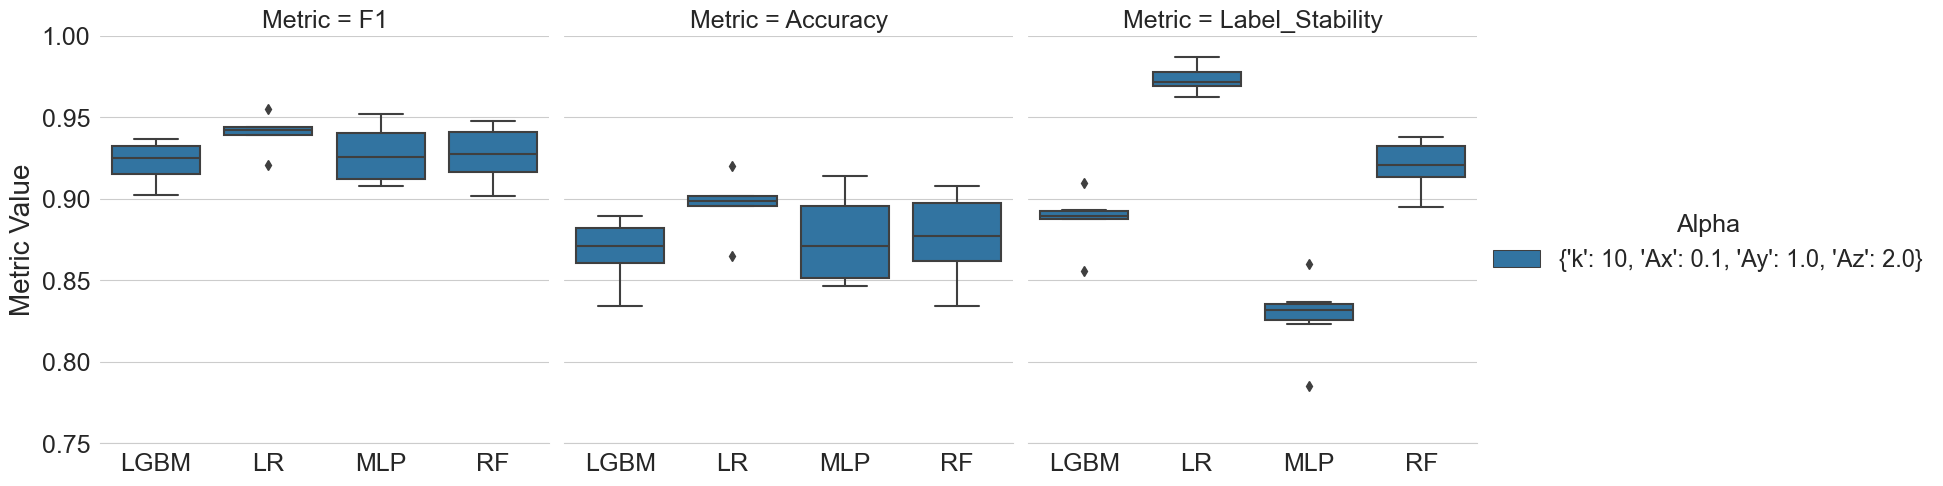

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

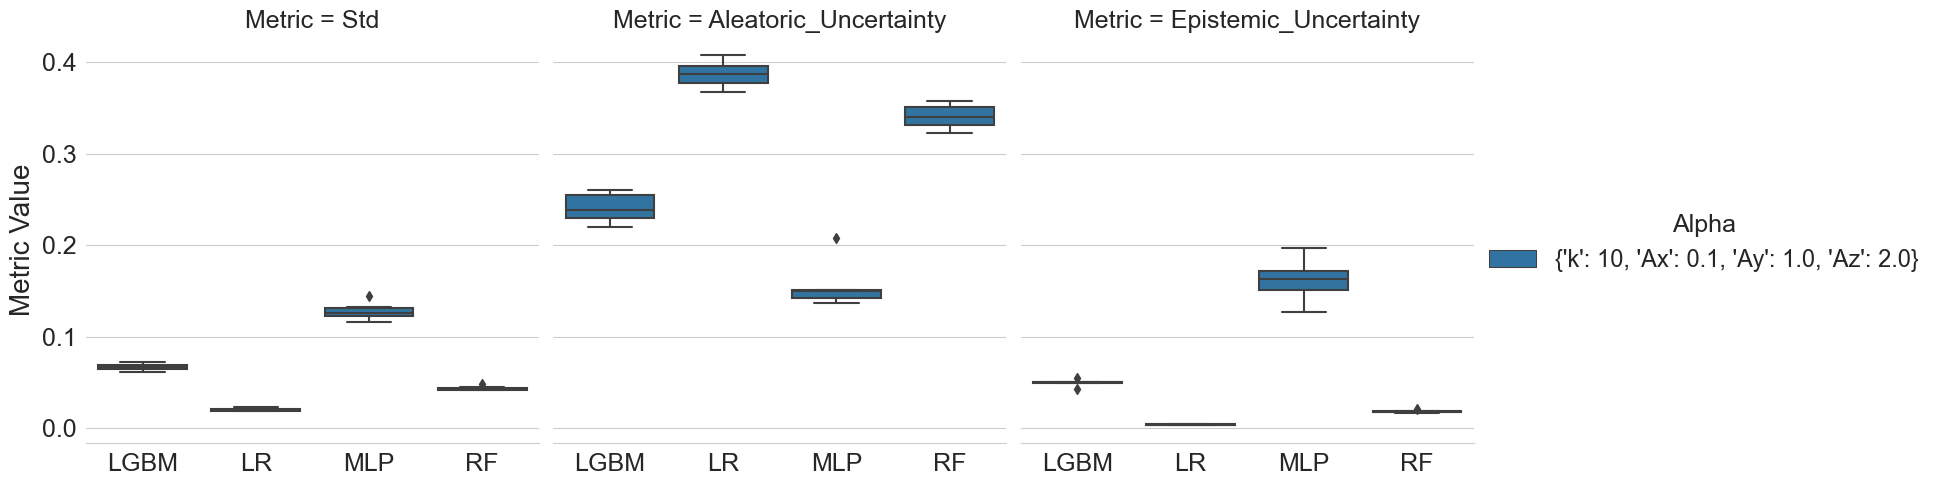

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

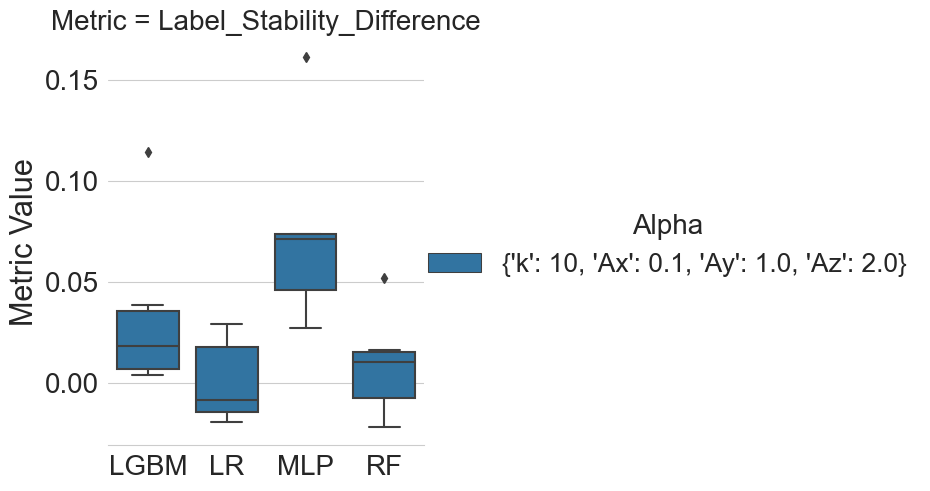

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

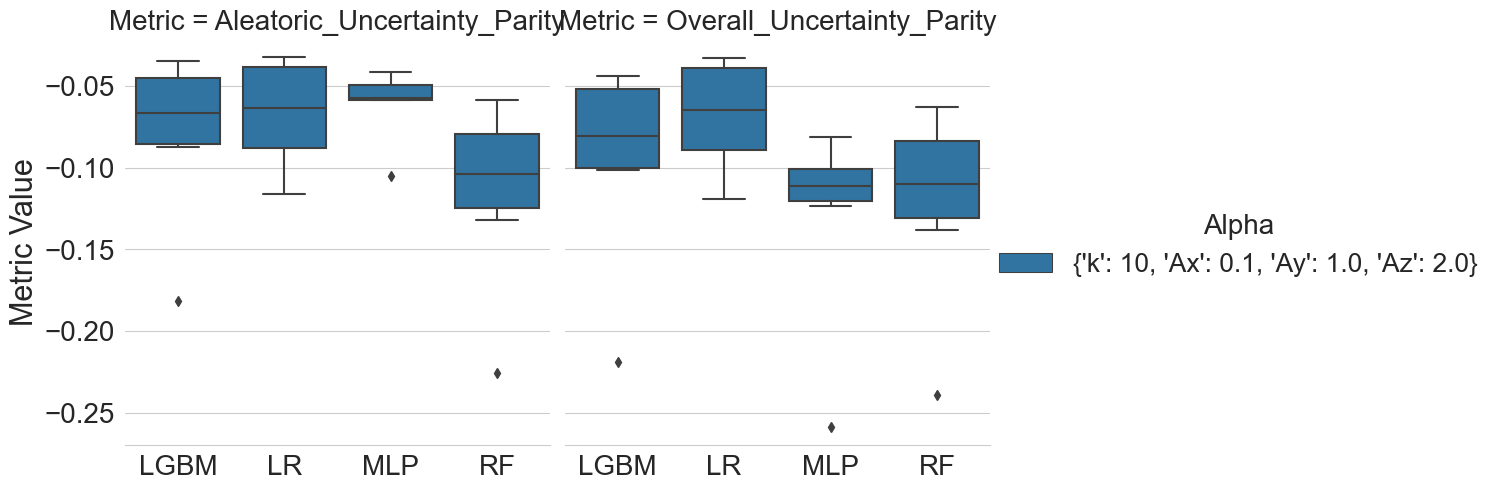

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

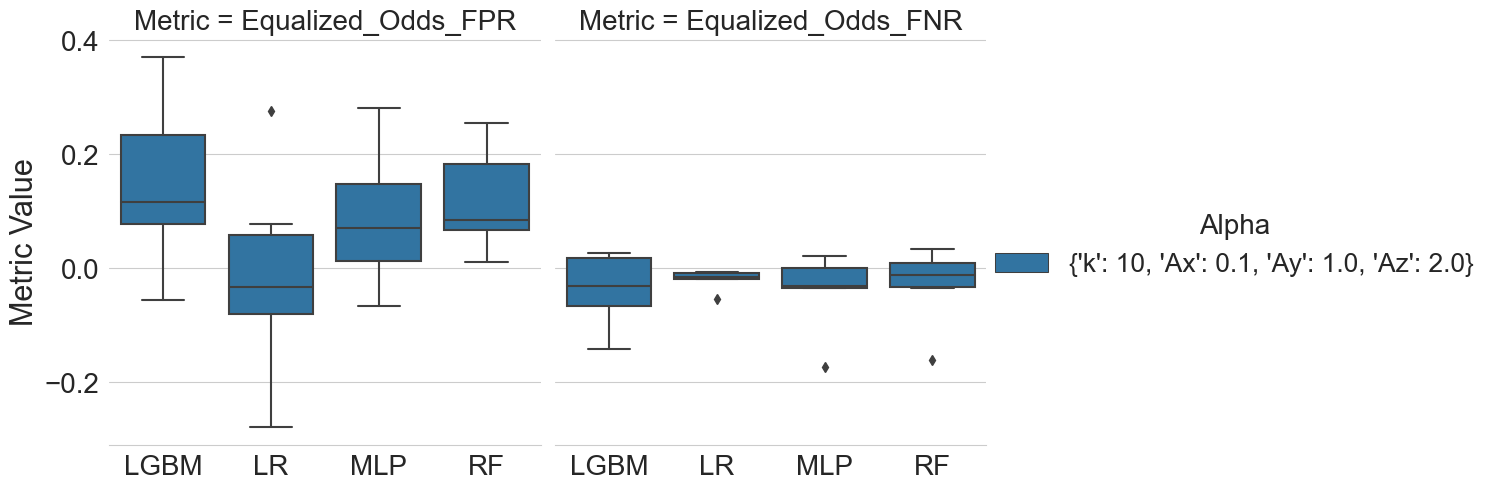

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

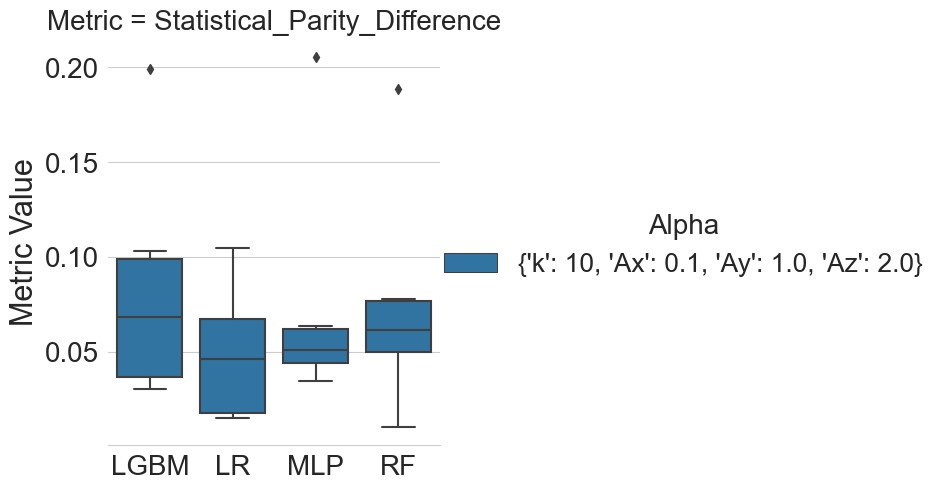

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)